# Sleep Analysis Data Science Project

In [ ]:
import pandas as pd

# importing the data
sleep_data = pd.read_csv('SleepData_2021-05-30_2024-03-01.csv')
activity_data = pd.read_csv('ActivityData_2021-05-30_2024-03-01.csv')
readiness_scores = pd.read_csv('ReadinessScores_2021-05-30_2024-03-01.csv')

# Convert the 'date' columns to datetime
activity_data['date'] = pd.to_datetime(activity_data['date'])
sleep_data['date'] = pd.to_datetime(sleep_data['date'])
readiness_scores['date'] = pd.to_datetime(readiness_scores['date'])

# Remove timezone information
sleep_data['Bedtime Start'] = sleep_data['Bedtime Start'].str.slice(0, -6)
sleep_data['Bedtime End'] = sleep_data['Bedtime End'].str.slice(0, -6)

# Convert the 'Bedtime Start' and 'Bedtime End' columns to datetime
sleep_data['Bedtime Start'] = pd.to_datetime(sleep_data['Bedtime Start'])
sleep_data['Bedtime End'] = pd.to_datetime(sleep_data['Bedtime End'])

# checking the data was loaded in properly and where there are missing values
print(sleep_data.info()) # all durations are measured in milliseconds
print(activity_data.info())
print(readiness_scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        966 non-null    datetime64[ns]
 1   Sleep Score                 966 non-null    int64         
 2   Total Sleep Duration        965 non-null    float64       
 3   Total Bedtime               965 non-null    float64       
 4   Awake Time                  965 non-null    float64       
 5   REM Sleep Duration          965 non-null    float64       
 6   Light Sleep Duration        965 non-null    float64       
 7   Deep Sleep Duration         965 non-null    float64       
 8   Restless Sleep              965 non-null    float64       
 9   Sleep Efficiency            965 non-null    float64       
 10  Sleep Latency               965 non-null    float64       
 11  Sleep Timing                965 non-null    float64       

In [ ]:
# Shift the dates in the activity data by one day so that days activities are aligned with the
# effected sleep and readiness for that day
activity_data['date'] = activity_data['date'] + pd.DateOffset(days=1)
print(activity_data.head())


# Merge the dataframes using INNER JOIN on the 'date' column
merged_data = pd.merge(activity_data, sleep_data, on='date')
final_data = pd.merge(merged_data, readiness_scores, on='date')

print(final_data.head())
print(final_data.info())


        date  Activity Score  Activity Burn  Total Burn  Steps  Inactive Time  \
0 2021-05-31            88.0             73        1691   1985          25320   
1 2021-06-01             0.0            121        1749   2956          24540   
2 2021-06-02            77.0            125        1795   2901          20220   
3 2021-06-03            79.0            556        2265   9194          31800   
4 2021-06-04            69.0            178        1892   4098          39660   

   Rest Time  Low Activity Time  Medium Activity Time  High Activity Time  \
0      43440               4980                   120                   0   
1      53400               8160                   300                   0   
2      29760               7020                   480                   0   
3      38940              10320                  5340                   0   
4      35280              10320                  1140                   0   

   Average MET  Long Periods of Inactivity  
0    

In [ ]:
print('Total rows after merge:', len(final_data))
# Drop rows with missing values
final_data = final_data.dropna()
print('Total rows after dropping missing values:', len(final_data))

Total rows after merge: 965
Total rows after dropping missing values: 953


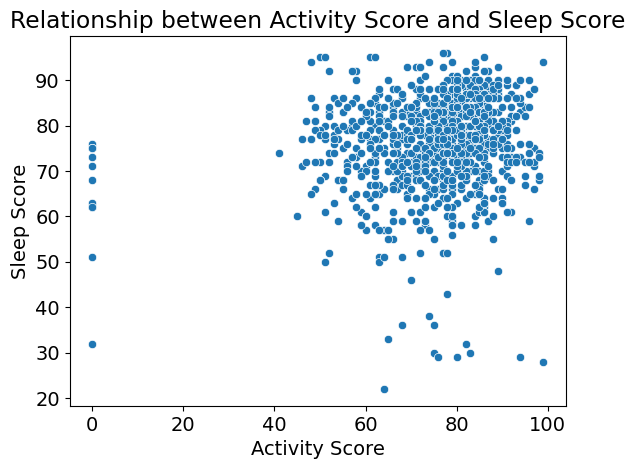

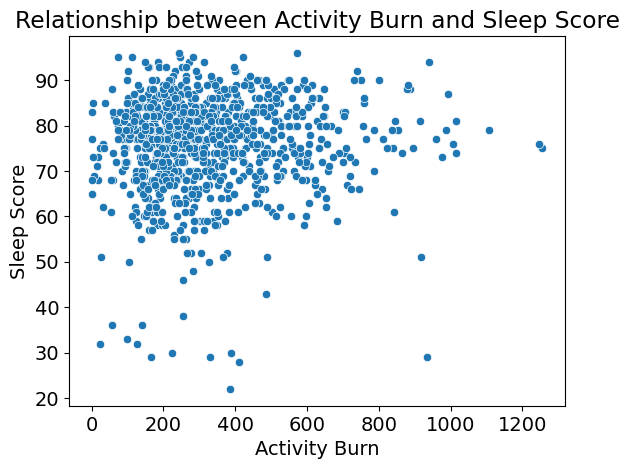

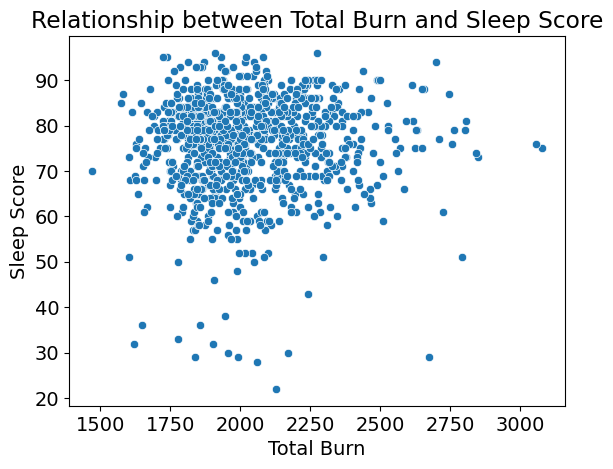

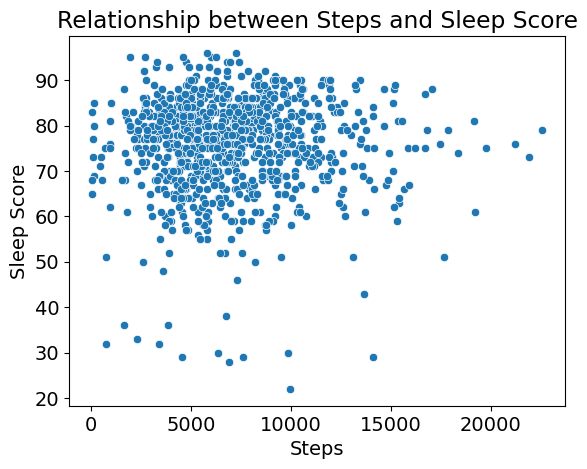

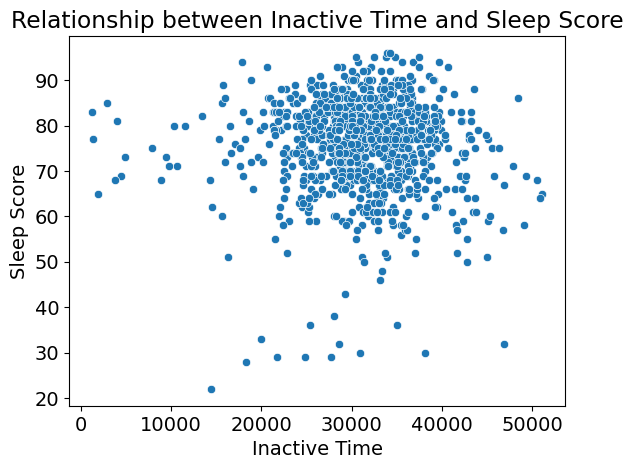

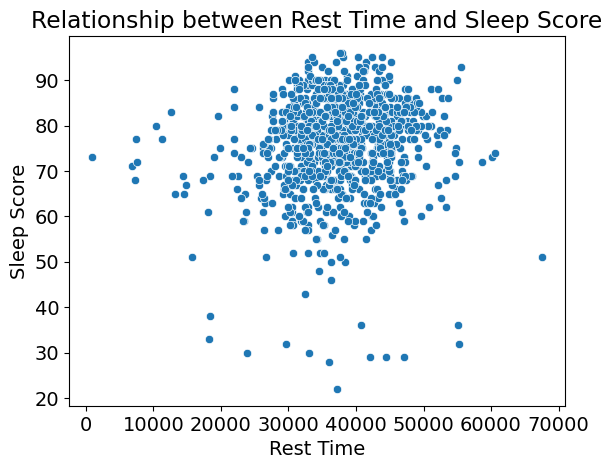

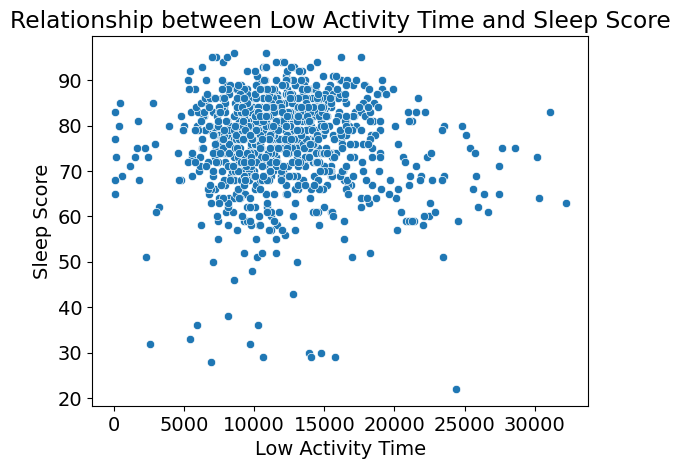

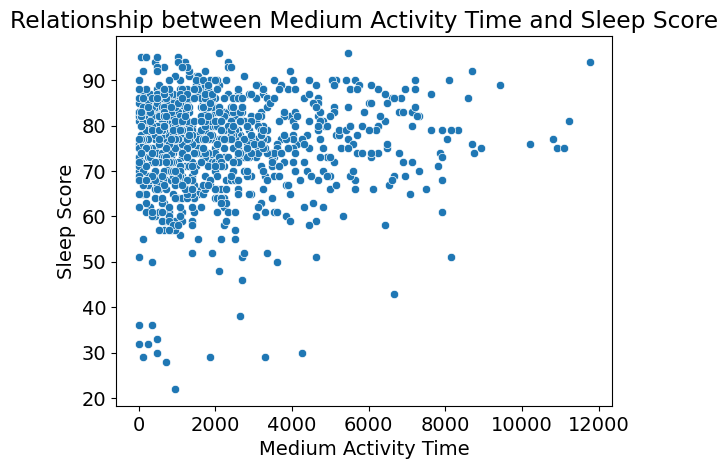

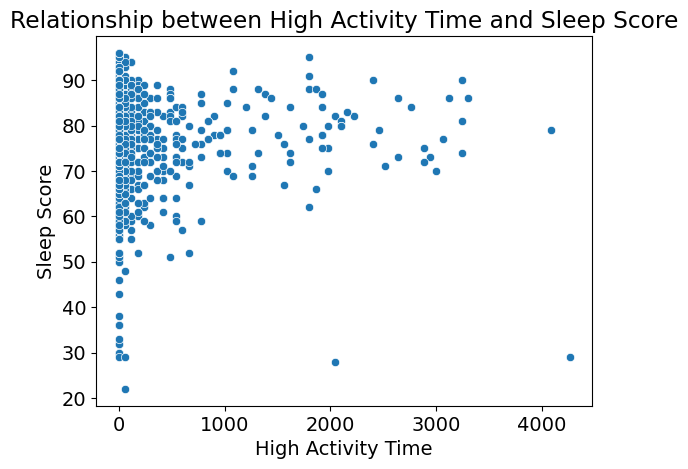

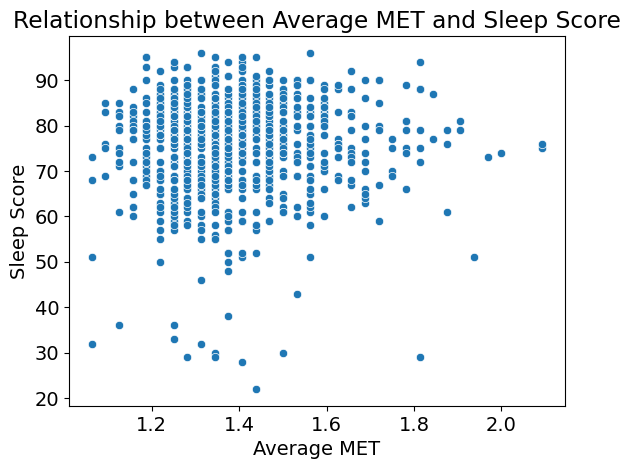

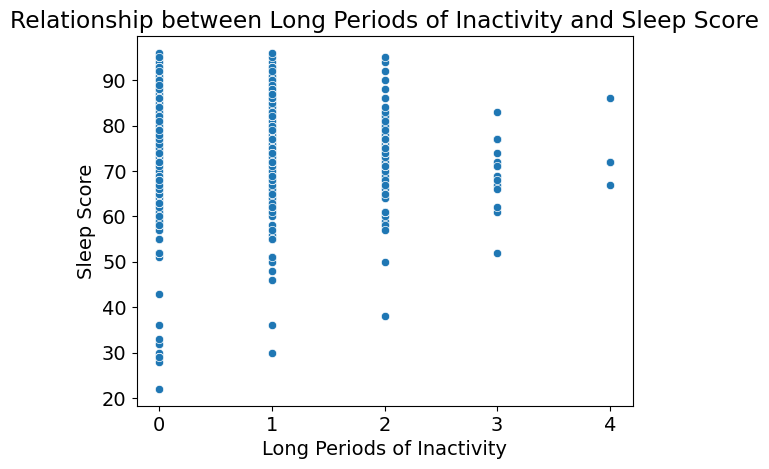

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the activity and sleep data on the date column
merged_data = pd.merge(activity_data, sleep_data, on='date', suffixes=('_activity', '_sleep'))

# List of explanatory variables (activity metrics)
activity_variables = ['Activity Score', 'Activity Burn', 'Total Burn', 'Steps', 'Inactive Time',
                      'Rest Time', 'Low Activity Time', 'Medium Activity Time', 'High Activity Time',
                      'Average MET', 'Long Periods of Inactivity']

# Target variable (sleep quality metric)
sleep_quality_metric = 'Sleep Score'

# Visualize the relationships between activity variables and sleep quality
for variable in activity_variables:
    sns.scatterplot(data=merged_data, x=variable, y=sleep_quality_metric)
    plt.title(f'Relationship between {variable} and {sleep_quality_metric}')
    plt.xlabel(variable)
    plt.ylabel(sleep_quality_metric)
    plt.show()

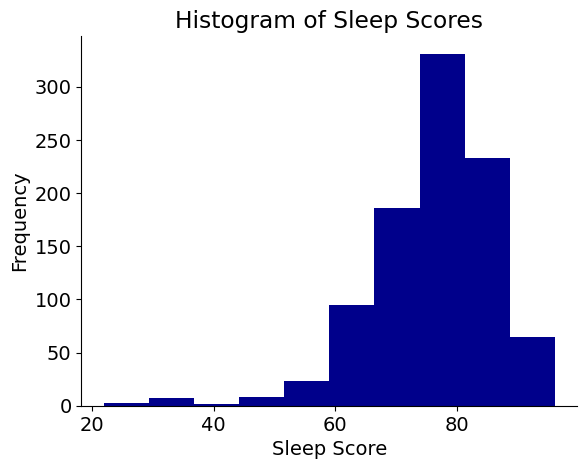

In [ ]:
import matplotlib.pyplot as plt

ax = final_data['Sleep Score'].hist(color='darkblue', grid=False)
plt.title('Histogram of Sleep Scores')
plt.xlabel('Sleep Score')
plt.ylabel('Frequency')

# Remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'Georgia'

plt.show()

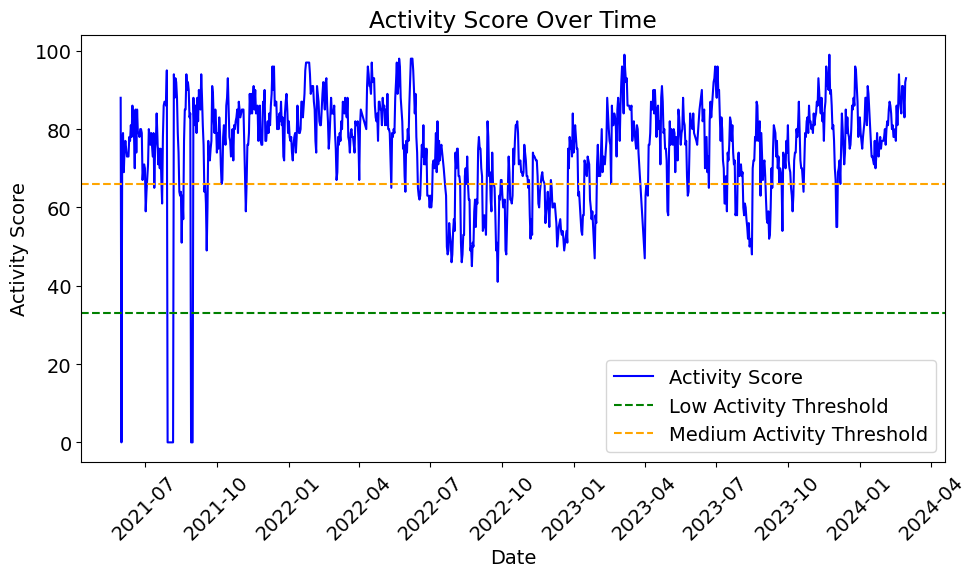

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Convert 'date' column to datetime format
final_data['date'] = pd.to_datetime(final_data['date'])

# Ensure 'Activity Score' is numeric (handling any non-numeric entries gracefully)
final_data['Activity Score'] = pd.to_numeric(final_data['Activity Score'], errors='coerce')

# Define the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Activity Score vs. Date
ax.plot(final_data['date'], final_data['Activity Score'], label='Activity Score', color='blue')

# Highlight different activity times using axhline or axvspan for visualization purposes
# Assuming activity scores thresholds for low, medium, high (example: 0-33, 34-66, 67-100)
low_threshold = 33
medium_threshold = 66

# Adding horizontal lines might not directly reflect individual activity times but can indicate thresholds
ax.axhline(low_threshold, color='green', linestyle='--', label='Low Activity Threshold')
ax.axhline(medium_threshold, color='orange', linestyle='--', label='Medium Activity Threshold')
# Everything above medium_threshold is considered High Activity

# Improve legibility
ax.set_title('Activity Score Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Activity Score')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Explanation of the chart

* Scores up to 33 are considered low activity (below the green line).
* Scores between 34 and 66 indicate medium activity (between the green and orange lines).
* Scores above 66 are categorized as high activity (above the orange line).

In [ ]:
def time_to_minutes(time):
    return time.hour * 60 + time.minute

avg_start_time_minutes = final_data['Bedtime Start'].dt.time.apply(time_to_minutes).mean()
avg_end_time_minutes = final_data['Bedtime End'].dt.time.apply(time_to_minutes).mean()

# Convert times back to HH:MM
avg_start_time = f"{int(avg_start_time_minutes // 60):02d}:{int(avg_start_time_minutes % 60):02d}"
avg_end_time = f"{int(avg_end_time_minutes // 60):02d}:{int(avg_end_time_minutes % 60):02d}"

print(f"Average Bedtime Start: {avg_start_time}")
print(f"Average Bedtime End: {avg_end_time}")

Average Bedtime Start: 10:54
Average Bedtime End: 09:33


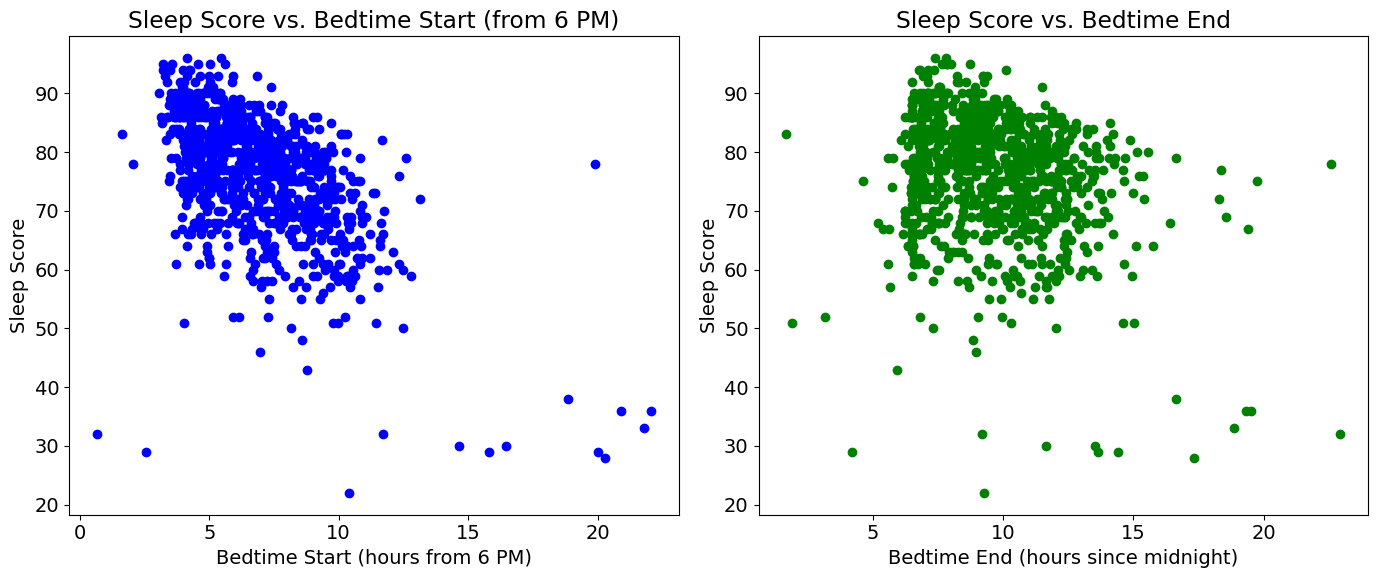

The correlation coefficient between Sleep Score and Bedtime Start (hours from 6 PM) is: -0.5560405193160795
The correlation coefficient between Sleep Score and Bedtime End (hours since midnight) is: -0.254491386313329


In [ ]:
#Making copy so we don't overwrite the original df
temp_sleep_data = sleep_data.copy()
temp_sleep_data['Bedtime Start Seconds'] = (pd.to_datetime(temp_sleep_data['Bedtime Start']).dt.hour * 3600 +
                                            pd.to_datetime(temp_sleep_data['Bedtime Start']).dt.minute * 60 +
                                            pd.to_datetime(temp_sleep_data['Bedtime Start']).dt.second)
temp_sleep_data['Bedtime End Seconds'] = (pd.to_datetime(temp_sleep_data['Bedtime End']).dt.hour * 3600 +
                                          pd.to_datetime(temp_sleep_data['Bedtime End']).dt.minute * 60 +
                                          pd.to_datetime(temp_sleep_data['Bedtime End']).dt.second)

# If bedtime is before 6 PM, then it's the next day, so we add 24 hours
temp_sleep_data['Bedtime Start Hours From 6PM'] = ((temp_sleep_data['Bedtime Start Seconds'] - (18 * 3600)) / 3600) % 24

# Convert Bedtime End Seconds to hour
temp_sleep_data['Bedtime End Hours'] = temp_sleep_data['Bedtime End Seconds'] / 3600

# Scatter plot for Bedtime Start
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(temp_sleep_data['Bedtime Start Hours From 6PM'], temp_sleep_data['Sleep Score'], color='blue')
plt.xlabel('Bedtime Start (hours from 6 PM)')
plt.ylabel('Sleep Score')
plt.title('Sleep Score vs. Bedtime Start (from 6 PM)')

# Scatter plot for Bedtime End
plt.subplot(1, 2, 2)
plt.scatter(temp_sleep_data['Bedtime End Hours'], temp_sleep_data['Sleep Score'], color='green')
plt.xlabel('Bedtime End (hours since midnight)')
plt.ylabel('Sleep Score')
plt.title('Sleep Score vs. Bedtime End')

plt.tight_layout()
plt.show()

#Calculate and display correlation coefficients
correlation_coefficient_start_from_6pm = temp_sleep_data['Sleep Score'].corr(temp_sleep_data['Bedtime Start Hours From 6PM'])
correlation_coefficient_end = temp_sleep_data['Sleep Score'].corr(temp_sleep_data['Bedtime End Hours'])

print(f"The correlation coefficient between Sleep Score and Bedtime Start (hours from 6 PM) is: {correlation_coefficient_start_from_6pm}")
print(f"The correlation coefficient between Sleep Score and Bedtime End (hours since midnight) is: {correlation_coefficient_end}")

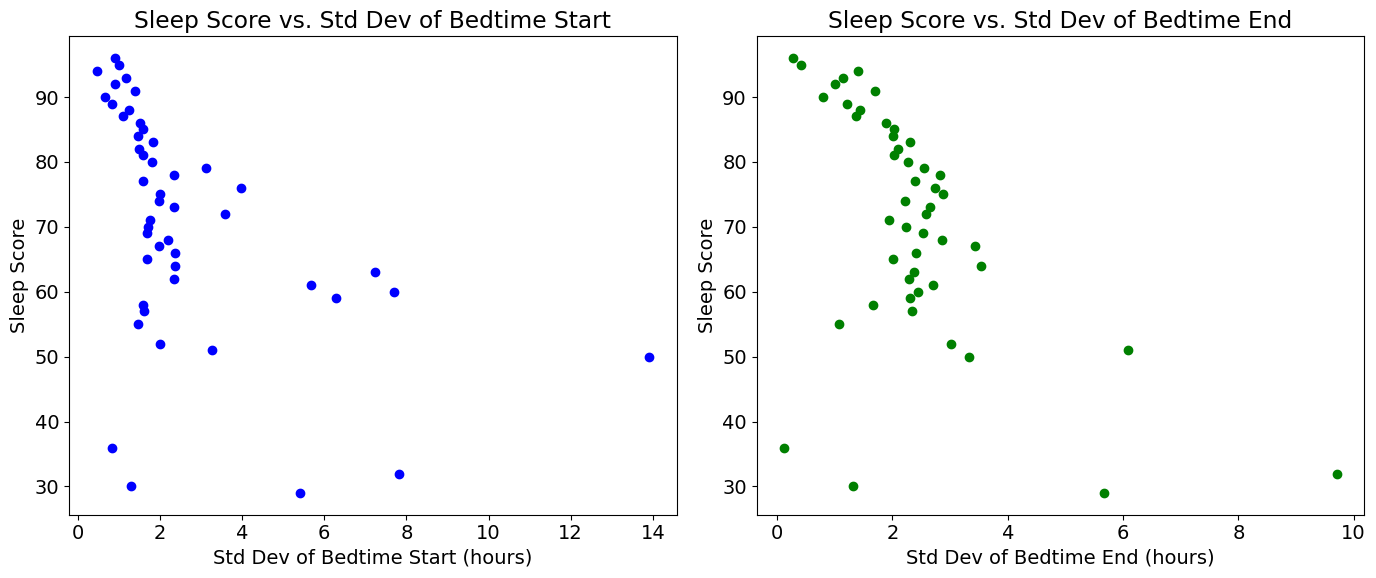

Correlation coefficient between Sleep Score and Std Dev of Bedtime Start: -0.4829420203169614
Correlation coefficient between Sleep Score and Std Dev of Bedtime End: -0.5429426700041473


In [ ]:
import matplotlib.pyplot as plt

temp_sleep_data['Bedtime Start Seconds Adjusted'] = temp_sleep_data['Bedtime Start Seconds'].apply(lambda x: (x - 21600) % (24 * 3600))

# Standard deviation
grouped_data = temp_sleep_data.groupby('Sleep Score').agg({
    'Bedtime Start Seconds Adjusted': 'std',
    'Bedtime End Seconds': 'std'
})

grouped_data.reset_index(inplace=True)

# Convert standard deviation from seconds to hours
grouped_data['Bedtime Start Std Hours'] = grouped_data['Bedtime Start Seconds Adjusted'] / 3600
grouped_data['Bedtime End Std Hours'] = grouped_data['Bedtime End Seconds'] / 3600


# Scatter plot for Bedtime Start
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(grouped_data['Bedtime Start Std Hours'], grouped_data['Sleep Score'], color='blue')
plt.xlabel('Std Dev of Bedtime Start (hours)')
plt.ylabel('Sleep Score')
plt.title('Sleep Score vs. Std Dev of Bedtime Start')

# Scatter plot for Bedtime End
plt.subplot(1, 2, 2)
plt.scatter(grouped_data['Bedtime End Std Hours'], grouped_data['Sleep Score'], color='green')
plt.xlabel('Std Dev of Bedtime End (hours)')
plt.ylabel('Sleep Score')
plt.title('Sleep Score vs. Std Dev of Bedtime End')

plt.tight_layout()
plt.show()

start_corr = grouped_data['Bedtime Start Std Hours'].corr(grouped_data['Sleep Score'])
print(f"Correlation coefficient between Sleep Score and Std Dev of Bedtime Start: {start_corr}")

# correlation coefficient
end_corr = grouped_data['Bedtime End Std Hours'].corr(grouped_data['Sleep Score'])
print(f"Correlation coefficient between Sleep Score and Std Dev of Bedtime End: {end_corr}")

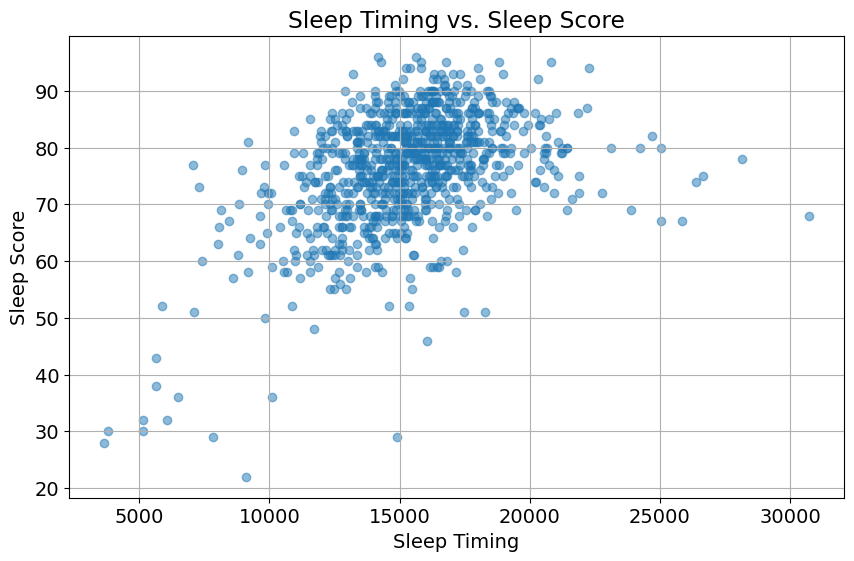

The correlation coefficient between Sleep Timing and Sleep Score is: 0.452130124296794


In [ ]:
#Values less than 3000 are naps and can be ignored
filtered_sleep_data = sleep_data[sleep_data['Sleep Timing'] >= 3000]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_sleep_data['Sleep Timing'], filtered_sleep_data['Sleep Score'], alpha=0.5)
plt.title('Sleep Timing vs. Sleep Score')
plt.xlabel('Sleep Timing')
plt.ylabel('Sleep Score')
plt.grid(True)
plt.show()

correlation_coefficient = filtered_sleep_data['Sleep Timing'].corr(sleep_data['Sleep Score'])

print(f"The correlation coefficient between Sleep Timing and Sleep Score is: {correlation_coefficient}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# final data has all the data merged and cleaned
# dropping columns that make up the target variable - Sleep Score as to prevent data leakage
modelDataset = final_data.drop(['date', 'Total Sleep Duration', 'REM Sleep Duration',
                                'Light Sleep Duration', 'Deep Sleep Duration', 'Sleep Timing',
                                'Bedtime Start', 'Bedtime End'], axis=1)

# we are predicting sleep score so we drop it from the feature columns
feature_columns = modelDataset.drop('Sleep Score', axis=1)
target_column = modelDataset['Sleep Score']

# assigining the feature columns and target column to X and y respectively
X = feature_columns
y = target_column

# partition the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

### Random Forest Model:

In [ ]:
# RF: Number of trees, max depth of trees, min samples split, and min samples leaf as hyperparameters
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters for Random Forest Regressor model:\n {best_params}")


Best hyperparameters for Random Forest Regressor model:
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# evaluating random forest regressor model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Predict the target variable using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score for Random Forest Regressor Model: {r2.round(2)}")

# evaluating the model using Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Random Forest Regressor Model: {MSE.round(2)}")

# evaluating the model using Mean Absolute Percentage Error (MAPE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
# expressing as percentage
print(f"Mean Absolute Percentage Error for Random Forest Regressor Model: {MAPE * 100:.2f}%")


R^2 Score for Random Forest Regressor Model: 0.65
Mean Squared Error for Random Forest Regressor Model: 31.45
Mean Absolute Percentage Error for Random Forest Regressor Model: 6.26%


MSE random forest regressor interpertation: the target variable is 'Sleep Score' which ranges from 0 to 100. An MSE of 31.45 means that, on average, your model's predictions are approximately sqrt(31.45) = 5.61 units away from the actual values, considering that the errors are squared before they are averaged.

MAPE: The Mean Absolute Percentage Error (MAPE) is a measure of prediction accuracy of a forecasting method in statistics that I use to evaluate my models. It calculates the average of the absolute differences between my predicted values and the actual values, and expresses this as a percentage relative to the actual values.

For instance, a MAPE of 6.26% for my Random Forest Regressor Model indicates that, on average, my model's predictions deviate by about 6.26% from the actual values. To put it into perspective, if an actual value was 100, my model, on average, would predict about 6.26 units off.

This represents a relatively low error rate, suggesting that my model performs well in terms of accuracy.

Can delete or edit this, just to inform you what these measurements are saying...

### Gradient Boosting Machine Model:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters to tune: Learning rate, number of estimators,
# max depth of trees, min samples split, and min samples leaf

param_grid = {
    'learning_rate': [0.01, 0.1, 0.25],
    'n_estimators': [50, 75, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]
}

# Grid search with cross-validation
grid_search = GridSearchCV(gbm_model, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters for Gradient Boosting Regressor model:\n {best_params}")

Best hyperparameters for Gradient Boosting Regressor model:
 {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 75}


In [ ]:
# evaluating gradient boosting regressor model

# Predict the target variable using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score for Gradient Boosting Regressor Model: {r2.round(2)}")

# evaluating the model using Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Gradient Boosting Regressor Model: {MSE.round(2)}")

# evaluating the model using Mean Absolute Percentage Error (MAPE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
# expressing as percentage
print(f"Mean Absolute Percentage Error for Gradient Boosting Regressor Model: {MAPE * 100:.2f}%")

R^2 Score for Gradient Boosting Regressor Model: 0.67
Mean Squared Error for Gradient Boosting Regressor Model: 29.77
Mean Absolute Percentage Error for Gradient Boosting Regressor Model: 6.00%


### Support Vector Machine Model:

In [ ]:
from sklearn import svm

# normalizing the data for SVM model as this model is sensitive to the scale of the data
# scaling x_train and x_test using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# scaling y_train and y_test using StandardScaler
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Define the model
svm_model = svm.SVR()

# Define the hyperparameters to tune: C, kernel, and epsilon
param_grid = {
    'C': [0.1, 1, 5],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.3]
}

# Grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_scaled.ravel()) # ravel() to convert 1D array which is required

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters for Support Vector Machine Regressor model:\n {best_params}")

Best hyperparameters for Support Vector Machine Regressor model:
 {'C': 0.1, 'epsilon': 0.3, 'kernel': 'linear'}


In [ ]:
# evaluating support vector machine regressor model

# Predict the target variable using the best hyperparameters
y_pred_scaled = grid_search.predict(X_test_scaled)
# Reshape y_pred_scaled to a 2D array and apply inverse transformation
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score for Support Vector Machine Regressor Model: {r2.round(2)}")

# evaluating the model using Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Support Vector Machine Regressor Model: {MSE.round(2)}")

# evaluating the model using Mean Absolute Percentage Error (MAPE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
# expressing as percentage
print(f"Mean Absolute Percentage Error for Support Vector Machine Regressor Model: {MAPE * 100:.2f}%")

R^2 Score for Support Vector Machine Regressor Model: 0.63
Mean Squared Error for Support Vector Machine Regressor Model: 33.0
Mean Absolute Percentage Error for Support Vector Machine Regressor Model: 6.18%


### Choosing the Best Model
Out of the three models random forest, gradient boosting machine, and support vector machine, our team has selected the gradient boosting regressor model based off of it's superior scores in the evaluated metrics. It had the highest r^2 score out of the three models with a score of 0.67 compared to .65 (random forest regressor model) and .63 (support vector machine regressor model), meaning that the features were able to explain .67 of the variance of the dependent variable - sleep score compared to the baseline variance of sleep score, whilst the other two models explained slightly less.

A r^2 score of .67 is a modest score with room for improvement, yet we believe that it can have practical use as it shows that the feature selection definitely does play a role in someone sleep score, and thus their sleep quality.

Onto the MSE (mean squared error) metric, the gradient boosting machine had the lowest score at 29.77, indicating it perofmred the best along this metric too. The MSE, the average of the squared differences between the predicted and actual values, was lowest for the gradient boosting machine indicating that it's predictions had the smallest differences between the actual target variable compared to random forest model - 31.45 and support vector machine with a MSE of 33. To quickly calculate the RMSE for the gradient boosting machine, we get 5.46, this metric in units of target variable. Meaning the average deviation of the prediction of the gradient boosting machine was 5.46 from the actual observed values, in the same units as target variable. This is fairly accurate as the target value had a range of 0-100 and an average eviation isnof 5.46 isn't much.

Lastly we also evaluated each metric using MAPE (mean absolute percentage error), in which gradient boosting machine also perofrmed best on, with the lowest score of 6.00% compared to random forest at 6.26% and SVM at 6.18%.